In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchfsm.mesh import MeshGrid
from torchfsm.operator import run_operators
from torchfsm.operator import Grad, Div, Laplacian, Curl, Convection, SpatialDerivative

## Notation

* $p$ scalar field.
* $\mathbf{u}$ vector field

## Spatial deritivate

`SpatialDeritivate` calculates the spatial deritivate of a scalar field w.r.t to a spatial dimension:

$$
\frac{\partial ^n}{\partial i} p
$$

where $i = x, y, z, \cdots$ and $n=1, 2, 3$

In [2]:
mesh_grid=MeshGrid([(0, 4*torch.pi, 64), (0, 2*torch.pi, 32), (0, 8*torch.pi, 128)])
x,y,z=mesh_grid.bc_mesh_grid()
u=torch.sin(x)+torch.cos(y)+torch.sin(z)+torch.cos(z)
u_x, u_y, u_z, u_yy = run_operators(
    u,
    [SpatialDerivative(0,1), SpatialDerivative(1,1), SpatialDerivative(2,1), SpatialDerivative(1,2)],
    mesh_grid
)

/home/liu/anaconda3/envs/deeplearning/lib/python3.10/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Text(0, 0.5, 'value')

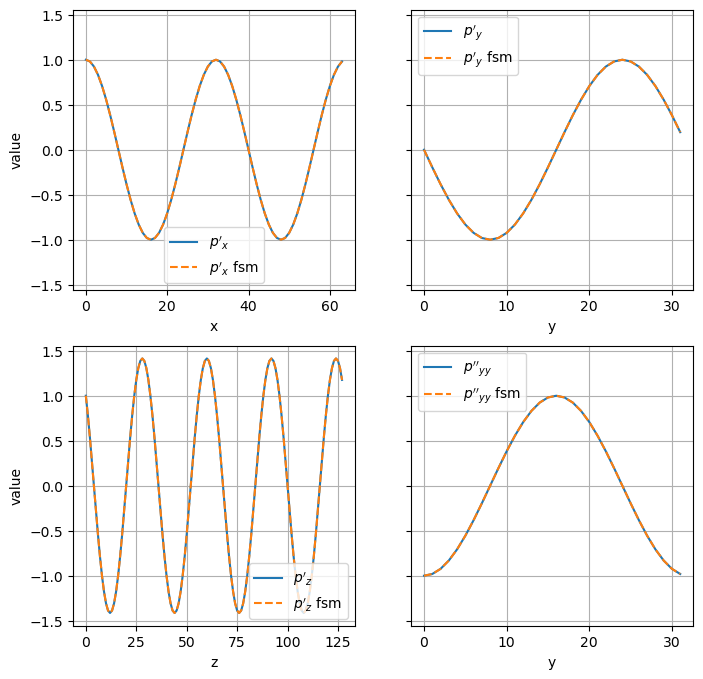

In [3]:
x=mesh_grid.x.numpy()
y=mesh_grid.y.numpy()
z=mesh_grid.z.numpy()
labels=["$p'_x$","$p'_y$","$p'_z$","$p''_{yy}$"]
gds = [
    np.cos(x),
    -1*np.sin(y),
    np.cos(z)-np.sin(z),
    -1*np.cos(y)
]
pds = [
    u_x[0,0,:,15,15],
    u_y[0,0,15,:,15],
    u_z[0,0,15,15,:],
    u_yy[0,0,15,:,15]
]
x_label = ["x","y","z","y"]

fig, axs = plt.subplots(2, 2,sharey=True,figsize=(8,8))
for i,ax in enumerate(axs.flat):
    ax.plot(gds[i],label=labels[i])
    ax.plot(pds[i],label=f"{labels[i]} fsm", linestyle='dashed')
    ax.set_xlabel(x_label[i])
    ax.grid(True)
    ax.legend()
axs[0,0].set_ylabel("value")
axs[1,0].set_ylabel("value")

## Gradient

`Grad` calculates the spatial gradient of a scalar field:

$$
\nabla p = \left[\begin{matrix}
\frac{\partial p}{\partial x} \\
\frac{\partial p}{\partial y} \\
\frac{\partial p}{\partial z}
\end{matrix}
\right]
$$

In [7]:
grad=Grad()
grad_p=grad(u=u,mesh=mesh_grid)

Text(0, 0.5, 'value')

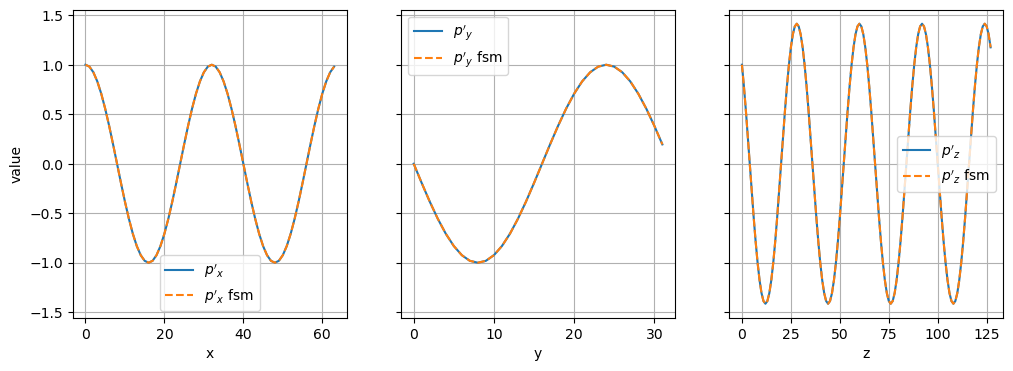

In [8]:
labels=["$p'_x$","$p'_y$","$p'_z$"]
gds = [
    np.cos(x),
    -1*np.sin(y),
    np.cos(z)-np.sin(z),
]
pds = [
    grad_p[0,0,:,15,15],
    grad_p[0,1,15,:,15],
    grad_p[0,2,15,15,:],
]
x_label = ["x","y","z"]
fig, axs = plt.subplots(1, 3,sharey=True,figsize=(12,4))
for i,ax in enumerate(axs.flat):
    ax.plot(gds[i],label=labels[i])
    ax.plot(pds[i],label=f"{labels[i]} fsm", linestyle='dashed')
    ax.set_xlabel(x_label[i])
    ax.grid(True)
    ax.legend()
axs[0].set_ylabel("value")

$$
\nabla \cdot(\nabla p)=\nabla ^2p=\frac{\partial^2p}{\partial x^2}+\frac{\partial^2p}{\partial y^2}+\frac{\partial^2p}{\partial z^2}
$$

In [3]:
nabla,nabla2=fourier_spatial_nabla(u,mesh_grid,order=[1,2])

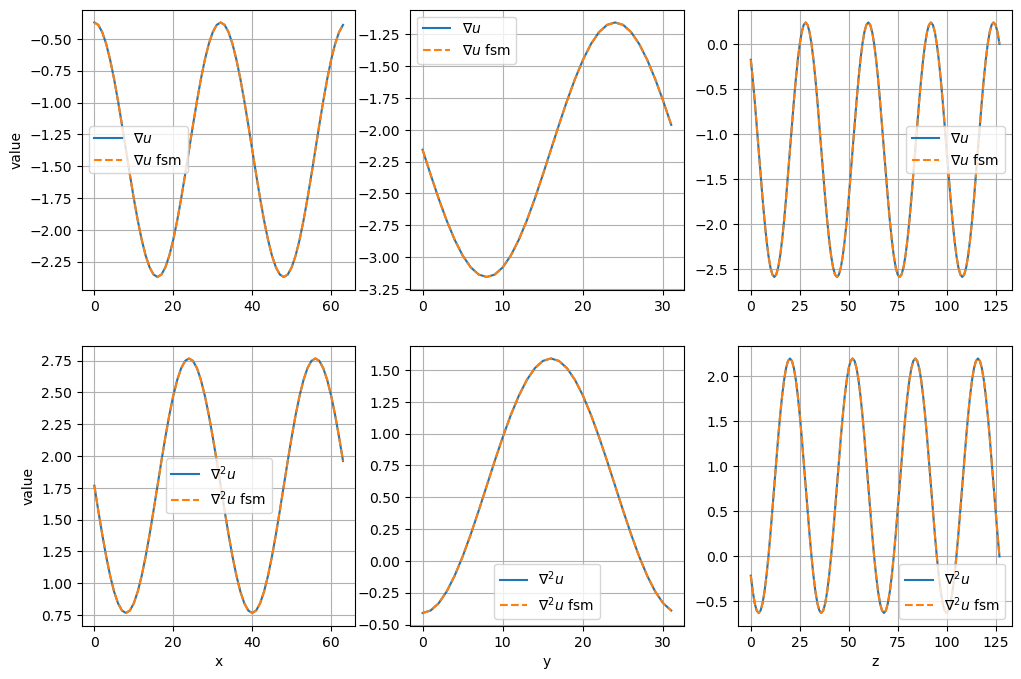

In [4]:
x,y,z=mesh_grid.bc_mesh_grid()
nabla_gd=(torch.cos(x)-torch.sin(y)+torch.cos(z)-torch.sin(z)).numpy()
nabla2_gd=(-torch.sin(x)-torch.cos(y)-torch.sin(z)-torch.cos(z)).numpy()

gds=[
    nabla_gd[0,0,:,15,15],
    nabla_gd[0,0,15,:,15],
    nabla_gd[0,0,15,15,:],
    nabla2_gd[0,0,:,15,15],
    nabla2_gd[0,0,15,:,15],
    nabla2_gd[0,0,15,15,:],
]
ffts=[
    nabla[0,0,:,15,15],
    nabla[0,0,15,:,15],
    nabla[0,0,15,15,:],
    nabla2[0,0,:,15,15],
    nabla2[0,0,15,:,15],
    nabla2[0,0,15,15,:],
]
labels=[
    "$\\nabla u$",
    "$\\nabla u$",
    "$\\nabla u$",
    "$\\nabla^2 u$",
    "$\\nabla^2 u$",
    "$\\nabla^2 u$",
]

fig, axs = plt.subplots(2, 3,figsize=(12,8))
for gd,fft,ax,label in zip(gds,ffts,axs.flat,labels):
    ax.plot(gd,label=label)
    ax.plot(fft,label=label+" fsm", linestyle='dashed')
    ax.grid(True)
    ax.legend()

axs[0,0].set_ylabel("value")
axs[1,0].set_ylabel("value")
axs[1,0].set_xlabel("x")
axs[1,1].set_xlabel("y")
axs[1,2].set_xlabel("z")
plt.show()

In [5]:
import torch

torch.cross(torch.tensor([1.,0.,4,5]),
            torch.tensor([0.,1.,4,5]),
            dim=0)

RuntimeError: linalg.cross: inputs dimension 0 must have length 3. Got 4 and 4

In [9]:
a=torch.ones(50,3,1,128,128)
b=torch.ones(50,1,3,128,128)
(a*b).shape

torch.Size([50, 3, 3, 128, 128])

In [10]:
a=torch.ones(1,1,128,1,1)
b=torch.ones(1,1,1,32,1)
c=torch.ones(1,1,1,1,64)
torch.cat([a,b,c],dim=1).shape

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 128 but got size 1 for tensor number 1 in the list.

In [11]:
(1,2)+(3,4)

(1, 2, 3, 4)

In [13]:
u=torch.ones(1,2,128,128)
uu=u.unsqueeze(2)*u.unsqueeze(1)
uu.shape
vector=torch.ones(1,2,128,128)
vector.unsqueeze(2)*uu

torch.Size([1, 2, 1, 128, 128])

In [30]:
a=torch.tensor([1.0,2.0,3.0])
b=torch.tensor([1.0,2.0,3.0])
c=a.unsqueeze(1)*b.unsqueeze(0)
print(c)
d=torch.tensor([1.0,2.0,3.0])
(d.unsqueeze(1)*c).sum(0)

tensor([[1., 2., 3.],
        [2., 4., 6.],
        [3., 6., 9.]])


tensor([14., 28., 42.])